# 2주차, 5일차 : 오버피팅과 언더피팅, 데이터 로드, 모델 저장 및 복원 코드 작성 손에 익을 때까지 암기

- ### Contents 
    1. Overfit And Underfit : https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
    2. Load CSV Data : https://www.tensorflow.org/tutorials/load_data/csv
    3. TFRecord and tf.Example : https://www.tensorflow.org/tutorials/load_data/tfrecord
    4. Save and load models : https://www.tensorflow.org/tutorials/keras/save_and_restore_models

## 1. Overfit And Underfit (1/3)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow-gpu==2.0.0

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 54.7MB/s 
     |████████████████████████████████| 450kB 42.1MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

2.0.0


In [2]:
# IMDB 데이터셋 다운로드
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

# 멀티-핫 인코딩은 정수 시퀀스를 0과 1로 이루어진 벡터로 변환합니다.
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만든다.
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # results[i]의 특정 인덱스만 1로 설정.
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 1s 0us/step


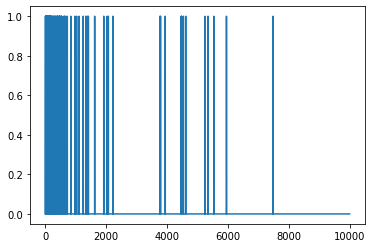

In [3]:
plt.plot(train_data[0])

In [4]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
# 기준 모델 만들기
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1,  activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4823 - accuracy: 0.8078 - binary_crossentropy: 0.4823 - val_loss: 0.3338 - val_accuracy: 0.8770 - val_binary_crossentropy: 0.3338
Epoch 2/20
25000/25000 - 2s - loss: 0.2406 - accuracy: 0.9146 - binary_crossentropy: 0.2406 - val_loss: 0.2819 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2819
Epoch 3/20
25000/25000 - 2s - loss: 0.1736 - accuracy: 0.9384 - binary_crossentropy: 0.1736 - val_loss: 0.2943 - val_accuracy: 0.8833 - val_binary_crossentropy: 0.2943
Epoch 4/20
25000/25000 - 2s - loss: 0.1361 - accuracy: 0.9536 - binary_crossentropy: 0.1361 - val_loss: 0.3308 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3308
Epoch 5/20
25000/25000 - 2s - loss: 0.1107 - accuracy: 0.9649 - binary_crossentropy: 0.1107 - val_loss: 0.3536 - val_accuracy: 0.8728 - val_binary_crossentropy: 0.3536
Epoch 6/20
25000/25000 - 2s - loss: 0.0899 - accuracy: 0.9720 - binary_crossentropy: 0.0899 - val_loss: 0.3972

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.6136 - accuracy: 0.7027 - binary_crossentropy: 0.6136 - val_loss: 0.5395 - val_accuracy: 0.8099 - val_binary_crossentropy: 0.5395
Epoch 2/20
25000/25000 - 2s - loss: 0.4595 - accuracy: 0.8687 - binary_crossentropy: 0.4595 - val_loss: 0.4242 - val_accuracy: 0.8734 - val_binary_crossentropy: 0.4242
Epoch 3/20
25000/25000 - 2s - loss: 0.3471 - accuracy: 0.9036 - binary_crossentropy: 0.3471 - val_loss: 0.3507 - val_accuracy: 0.8830 - val_binary_crossentropy: 0.3507
Epoch 4/20
25000/25000 - 2s - loss: 0.2784 - accuracy: 0.9176 - binary_crossentropy: 0.2784 - val_loss: 0.3146 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.3146
Epoch 5/20
25000/25000 - 2s - loss: 0.2356 - accuracy: 0.9270 - binary_crossentropy: 0.2356 - val_loss: 0.2976 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2976
Epoch 6/20
25000/25000 - 2s - loss: 0.2070 - accuracy: 0.9352 - binary_crossentropy: 0.2070 - val_loss: 0.2868

KeyboardInterrupt: ignored

In [0]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

In [0]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [0]:
# 훈련 손실과 검증 손실 그래프 그리기
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [0]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.0001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.0001),
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

In [0]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=[test_data, test_labels],
                                 verbose=2)

In [0]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])

## 1. Overfit And Underfit (2/3)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data  = multi_hot_sequences(test_data,  dimension=NUM_WORDS)

In [0]:
plt.plot(train_data[0])

In [0]:
train_data[0]

In [0]:
baseline_model = keras.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1,  activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])
baseline_model.summary()

In [0]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

In [0]:
smaller_model = keras.Sequential([
  keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

In [0]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

In [0]:
bigger_model = keras.models.Sequential([
  keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

In [0]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16, 10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_', ' ').title())
  plt.legend()

  plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller',  smaller_history),
              ('bigger',   bigger_history)])

In [0]:
l2_model = keras.models.Sequential([
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.0001), activation='relu', input_shape=(NUM_WORDS, )),
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.0001), activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])


l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


In [0]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

## 1. Overfit And Underfit (3/3)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, word_indices in enumerate(sequences):
    results[i, word_indices] = 1.0
  return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data  = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [0]:
plt.plot(train_data[0])

In [0]:
baseline_model = keras.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

In [0]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

In [0]:
smaller_model = keras.Sequential([
  keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

In [0]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

In [0]:
bigger_model = keras.models.Sequential([
  keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

In [0]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16, 10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key], 
             '--', label=name.title()+'val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller',  smaller_history),
              ('bigger',   bigger_history)])

In [0]:
l2_model = keras.models.Sequential([
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                     activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

In [0]:
plot_history([('baseline', baseline_history),
              ('l2',       l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
  keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

In [0]:
plot_history([('baseline', baseline_history),
              ('dpt',      dpt_model_history)])

## 2. Load CSV Data (1/3)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [0]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

In [0]:
# 넘파이 출력 옵션, precision은 소숫점 자리를 나타내는 정밀도 값, suppress는 고정 소수점으로 표현할지 유무
np.set_printoptions(precision=3, suppress=True)

In [0]:
# Load data
!head {train_file_path}

In [0]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [0]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5, # 확인하기 쉽게 임의로 작은 수치로 만들었다.
      label_name=LABEL_COLUMN,
      na_value='?',
      num_epochs=1,
      ignore_errors=True,
      **kwargs)
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data  = get_dataset(test_file_path)

In [0]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s} : {}".format(key, value.numpy()))

In [0]:
show_batch(raw_train_data)

In [0]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class',
               'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

In [0]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'class', 'deck', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS)

show_batch(temp_dataset)

In [0]:
# 데이터 전처리 하기

SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path,
                           select_columns=SELECT_COLUMNS,
                           column_defaults=DEFAULTS)

show_batch(temp_dataset)

In [0]:
example_batch, labels_batch = next(iter(temp_dataset))

In [0]:
def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label

In [0]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

In [0]:
show_batch(raw_train_data)

In [0]:
example_batch, labels_batch = next(iter(temp_dataset))

In [0]:
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names

  def __call__(self, features, labels):
    numeric_features = [features.pop(name) for name in self.names]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels

In [0]:
NUMERIC_FEATURES = ['age', 'n_siblings_spouses', 'parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))
packed_test_data  = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [0]:
example_batch, labels_batch = next(iter(packed_train_data))

In [0]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

In [0]:
MEAN = np.array(desc.T['mean'])
STD  = np.array(desc.T['std'])

In [0]:
def normalize_numeric_data(data, mean, std):
  return (data-mean)/std

In [0]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer,
                                                 shape=[len(NUMERIC_FEATURES)])
numeric_columns=[numeric_column]
numeric_column

In [0]:
example_batch['numeric']

In [0]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

In [0]:
# 범주형 데이터 처리
CATEGORIES = {
    'sex' : ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}

In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
      key=feature, vocabulary_list=vocab)
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [0]:
categorical_columns

In [0]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

In [0]:
# 전처리 계층으로 만들기
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)

In [0]:
print(preprocessing_layer(example_batch).numpy()[0])

In [0]:
# 모델 만들기
model = tf.keras.Sequential([
                             preprocessing_layer,
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
# 학습, 평가, 예측하기
train_data = packed_train_data.shuffle(500)
test_data  = packed_test_data

In [0]:
model.fit(train_data, epochs=20)

In [0]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

In [0]:
predictions = model.predict(test_data)

for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  print('Predicted survival: {:.2%}'.format(prediction[0]),
        ' | Actual outcome: ',
        ('SURVIVED' if bool(survived) else 'DIED'))

## 2. Load CSV Data (2/3)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [0]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

In [0]:
np.set_printoptions(precision=3, suppress=True)

In [0]:
!head {train_file_path}

In [0]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [0]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5,
      label_name=LABEL_COLUMN,
      na_value='?',
      num_epochs=1,
      ignore_errors=True,
      **kwargs)
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data  = get_dataset(test_file_path)

In [0]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
        print('{:20s}: {}'.format(key, value.numpy()))

In [0]:
show_batch(raw_train_data)

In [0]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class',
               'deck', 'embark_town', 'alone']

temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)
show_batch(temp_dataset)

In [0]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'class', 'deck', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS)
show_batch(temp_dataset)

In [0]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path,
                           select_columns=SELECT_COLUMNS,
                           column_defaults=DEFAULTS)
show_batch(temp_dataset)

In [0]:
example_batch, labels_batch = next(iter(temp_dataset))

In [0]:
def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label

In [0]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

In [0]:
show_batch(raw_train_data)

In [0]:
example_batch, labels_batch = next(iter(temp_dataset))

In [0]:
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names

  def __call__(self, features, labels):
    numeric_features = [features.pop(name) for name in self.names]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels

In [0]:
NUMERIC_FEATURES = ['age', 'n_siblings_spouses', 'parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES)
)

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES)
)

In [0]:
show_batch(packed_train_data)

In [0]:
example_batch, labels_batch = next(iter(packed_train_data))

In [0]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

In [0]:
MEAN = np.array(desc.T['mean'])
STD  = np.array(desc.T['std'])

In [0]:
def normalize_numeric_data(data, mean, std):
  return (data-mean)/std

In [0]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)
numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, 
                                                  shape=[len(NUMERIC_FEATURES)])
numeric_column = [numeric_column]
numeric_column

In [0]:
example_batch['numeric']

In [0]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

In [0]:
CATEGORIES = {
    'sex' : ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}

In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
      key=feature, vocabulary_list=vocab)
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [0]:
categorical_columns

In [0]:
categorical_layers = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

In [0]:
preprocessing_layer = tf.keras.layers.DenseFeatures(
    categorical_columns+numeric_columns
)

In [0]:
print(preprocessing_layer(example_batch).numpy()[0])

In [0]:
model = tf.keras.Sequential([
                             preprocessing_layer,
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
train_data = packed_train_data.shuffle(2019)
test_data  = packed_test_data

In [0]:
model.fit(train_data, epochs=20)

In [0]:
test_loss, test_accuracy = model.evaluate(test_data)

print('Test Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

In [0]:
predictions = model.predict(test_data)

for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  print('Predicted survival: {:.2%}'.format(prediction[0]),
        " | Actual outcome: ",
        ('SURVIVED' if bool(survived) else 'DIED'))

## 2. Load CSV Data (3/3)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

In [0]:
TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

In [0]:
np.set_printoptions(precision=3, suppress=True)

In [0]:
!head {train_file_path}

In [0]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

In [0]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5,
      label_name=LABEL_COLUMN,
      na_value='?',
      num_epochs=1,
      ignore_errors=True,
      **kwargs
      )
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data  = get_dataset(test_file_path)

In [0]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key, value.numpy()))

In [0]:
show_batch(raw_train_data)

In [0]:
CSV_COLUMNS = ['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
               'class', 'deck', 'embark_town', 'alone']
temp_dataset = get_dataset(train_file_path, column_names=CSV_COLUMNS)

show_batch(temp_dataset)

In [0]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'class', 'deck', 'alone']

temp_dataset = get_dataset(train_file_path, select_columns=SELECT_COLUMNS)

show_batch(temp_dataset)

In [0]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path,
                           select_columns=SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

show_batch(temp_dataset)

In [0]:
example_batch, labels_batch = next(iter(temp_dataset))

In [0]:
def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label

In [0]:
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

In [0]:
show_batch(raw_train_data)

In [0]:
example_batch, label_batch = next(iter(temp_dataset))

In [0]:
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names

  def __call__(self, features, labels):
    numeric_features = [features.pop(name) for name in self.names]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels

In [0]:
NUMERIC_FEATURES = ['age', 'n_siblings_spouses', 'parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES)
)
packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES)
)

In [0]:
show_batch(packed_train_data)

In [0]:
example_batch, lables_batch = next(iter(packed_train_data))

In [0]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

In [0]:
MEAN = np.array(desc.T['mean'])
STD  = np.array(desc.T['std'])

In [0]:
def normalize_numeric_data(data, mean, std):
  return (data-mean)/std

In [0]:
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)
numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer,
                                                  shape=[len(NUMERIC_FEATURES)])
numeric_column = [numeric_column]
numeric_column

In [0]:
example_batch['numeric']

In [0]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

In [0]:
CATEGORIES = {
    'sex' : ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B' ,'C' ,'D', 'E', 'F', 'G', 'H' ,'I', 'J'],
    'embark_town' : ['Cherbourg', 'Sourthhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}

In [0]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
      key=feature, vocabulary_list=vocab
  )
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))

In [0]:
categorical_columns

In [0]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

In [0]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns + numeric_columns)

In [0]:
print(preprocessing_layer(example_batch).numpy()[0])

In [0]:
model = tf.keras.Sequential([
                             preprocessing_layer,
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(1,   activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
train_data = packed_train_data.shuffle(2019)
test_data  = packed_test_data

In [0]:
model.fit(train_data, epochs=20)

In [0]:
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

In [0]:
predictions = model.predict(test_data)

for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  print('Predicted survival: {:2%}'.format(prediction[0]),
        ' | Actual outcome: ',('SURVIVED' if bool(survived) else 'DIED'))

# 3. TFRecord and tf.Example (1/3)

In [0]:
# 데이터를 효율적으로 읽기 위해서는 데이터를 순차적으로 읽는게 도움이 된다. 
# TFRcord 포맷은 바이너리 레코드의 sequence를 저장하는 간단한 포맷이다.

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import IPython.display as display

## tf.Example
### tf.Example을 위한 데이터 타입들.

기본적으로 tf.Example은 `{'string' : tf.train.Feature}` 이런 매핑이다.

`tf.train.Feature` 메시지 타입은 다음 3가지 타입을 받을 수 있다. 

1. `tf.train.BytesList`
  - `string`
  - `byte`

2. `tf.train.FloatList`
  - `float (float32)`
  - `double (float64)`

3. `tf.train.Int64List`
  - `bool`
  - `enum`
  - `int32`
  - `uint32`
  - `int64`
  - `uint64`

표준 Tensorflow type을 tf.Example과 호돤되는 tf.train.feature로 변환하기 위해 아래에 있는 함수들을 사용할 수 있습니다. 


In [0]:
def _bytes_feature(value):
  """ 문자열로부터 byte_list를 반환한다. """
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # ByteList는 문자열을 EagerTensor 로부터 풀어(Unpack)낼 수 없다.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  ''' 실수로부터 float_list릅 반환한다 ''' 
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  ''' 논리형으로부터 int64_list를 반환한다. '''
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [0]:
print(_bytes_feature(b'test_string'))
print(_bytes_feature(u'test_bytes'.encode('utf-8')))

print(_float_feature(np.exp(1)))

print(_int64_feature(True))
print(_int64_feature(1))

In [0]:
feature = _float_feature(np.exp(1))

feature.SerializeToString()

In [0]:
# tf.Example 메시지를 만드는 것은 존재하는 어떤 데이터에서든 가능하다. 
# 하지만 만드는 방법은 다 똑같다. 

# 숫자 관측치
n_observations = int(1e4)

# 논리 피쳐, False 또는 True로 인코딩 된 것이다.
feature0 = np.random.choice([False, True], n_observations)

# 정수 피쳐, 0~4 사이의 임의의 값이다.
feature1 = np.random.randint(0, 5, n_observations)

# 문자열 피쳐이다.
strings = np.array([b'cat', b'dog', b'chiken', b'horse', b'goat'])
feature2 = strings[feature1]

# 실수 피쳐이다. 정규 분포에서 추출되었다.
feature3 = np.random.randn(n_observations)

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
    '''
    tf.Example 메시지 만들기, 파일에 출력할 준비를 한다.
    '''
    # Feature 이름과 tf.Example-competiible과 매핑할 dictionary를 생성한다. 
    # 데이터 타입
    feature = {
        'feature0': _int64_feature(feature0),
        'feature1': _int64_feature(feature1),
        'feature2': _bytes_feature(feature2),
        'feature3': _float_feature(feature3)
    }

    # tf.train.Example을 사용하는 Featrue message 생성하기

    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [0]:
example_observation = []
serialized_example = serialize_example(False, 4, b'goat', 0.9876)
serialized_example

In [0]:
# tf.train.Example.FromString 함수를 사용해서 message를 복호화 하자.
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

In [0]:
# TFRecord 파일은 record들의 sequence로 이루어져있다. 그래서 이 파일은 순차적으로 밖에 읽을 수 있다.
# 각 record 는 data-payload를 위한 byte-string을 포함하고 있으며, data-length, 
# 그리고 무결성 체크를 위한 CRC32C 해쉬를 가지고 있다.

# tf.data를 사용한 TFRecord 파일
tf.data.Dataset.from_tensor_slices(feature1)

In [0]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

In [0]:
for f0,f1,f2,f3 in features_dataset.take(1):
  print(f0)
  print(f1)
  print(f2)
  print(f3)

In [0]:
def tf_serialize_example(f0,f1,f2,f3):
  tf_string = tf.py_function(
      serialize_example,
      (f0,f1,f2,f3),
      tf.string
  )
  return tf.reshape(tf_string, ())

In [0]:
tf_serialize_example(f0,f1,f2,f3)

In [0]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

In [0]:
def generator():
  for features in features_dataset:
    yield serialize_example(*features)

In [0]:
serialized_features_dataset = tf.data.Dataset.from_generator(
    generator, output_types=tf.string, output_shapes=()
)

In [0]:
serialized_features_dataset

In [0]:
filename = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

In [0]:
# TFRecord file 읽기
# tf.dataTFRecordDataset 클래스를 사용해서 TFRecord 파일을 읽을 수 있다.
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filename)
# 이 때 데이터 셋은 serialized된 tf.train.Example 메시지를 가지고 있음.
raw_dataset

In [0]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

In [0]:
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  return tf.io.parse_single_example(example_proto, feature_description)

In [0]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

In [0]:
for parsed_record in parsed_dataset.take(10):
  print(repr(parsed_record))

In [0]:
# Python에서의 TFRecord 파일
# TFRecord file에 쓰기
with tf.io.TFRecordWriter(filename) as writer:
  for i in range(n_observations):
    example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
    writer.write(example)

In [0]:
!du -sh {filename}

In [0]:
# TFRecord file 읽기
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

In [0]:
for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

In [0]:
# 이미지 데이터 읽기, 쓰기
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

In [0]:
display.display(display.Image(filename=williamsburg_bridge))
display.display(display.HTML('<a "href=https://commons.wikimedia.org/wiki/File:New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg">From Wikimedia</a>'))

In [0]:
# TFRecord file 쓰기
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}

In [0]:
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

def image_example(image_string, label):
  image_shape = tf.image.decode_jpeg(image_string).shape
  
  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
  print(line)
print('...')

In [0]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in image_labels.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [0]:
!du -sh {record_file}

In [0]:
# TFRecord file 읽기

raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):

  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

In [0]:
for image_features in parsed_image_dataset:
  image_raw = image_features['image_raw'].numpy()
  display.display(display.Image(data=image_raw))

# 3. TFRecord and tf.Example (2/3)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import IPython.display as display

In [0]:
def _bytes_feature(value):
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy()
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [0]:
print(_bytes_feature(b'test_string'))
print(_bytes_feature(u'test_bytes'.encode('utf-8'))) 

print(_float_feature(np.exp(1)))

print(_int64_feature(True))
print(_int64_feature(1))

In [0]:
feature = _float_feature(np.exp(1))

feature.SerializeToString()

In [0]:
n_observations = int(1e4)

feature0 = np.random.choice([False, True], n_observations)

feature1 = np.random.randint(0, 5, n_observations)

strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]

feature3 = np.random.randn(n_observations)

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [0]:
example_observation = []
serialized_example = serialize_example(False, 4, b'goat', 0.9876)
serialized_example

In [0]:
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

In [0]:
tf.data.Dataset.from_tensor_slices(feature1)

In [0]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

In [0]:
for f0,f1,f2,f3 in features_dataset.take(1):
  print(f0)
  print(f1)
  print(f2)
  print(f3)

In [0]:
def tf_serialize_example(f0,f1,f2,f3):
  tf_string = tf.py_function(
      serialize_example,
      (f0,f1,f2,f3),
      tf.string
  )
  return tf.reshape(tf_string, ())

In [0]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

In [0]:
def generator():
  for features in features_dataset:
    yield serialize_example(*features)

In [0]:
serialized_features_dataset = tf.data.Dataset.from_generator(
    generator, output_types=tf.string, output_shapes=()
)

In [0]:
serialized_features_dataset

In [0]:
filename = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

In [0]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

In [0]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

In [0]:
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  return tf.io.parse_single_example(example_proto, feature_description)

In [0]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

In [0]:
for parsed_record in parsed_dataset.take(10):
  print(repr(parsed_record))

In [0]:
with tf.io.TFRecordWriter(filename) as writer:
  for i in range(n_observations):
    example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
    writer.write(example)

In [0]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

In [0]:
for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

In [0]:
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')
display.display(display.Image(filename=cat_in_snow))
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))

In [0]:
display.display(display.Image(filename=williamsburg_bridge))
display.display(display.HTML('<a "href=https://commons.wikimedia.org/wiki/File:New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg">From Wikimedia</a>'))

In [0]:
image_labels={
    cat_in_snow:0,
    williamsburg_bridge:1,
}

In [0]:
image_string = open(cat_in_snow,'rb').read()

label = image_labels[cat_in_snow]

def image_example(image_string, label):
  image_shape = tf.image.decode_jpeg(image_string).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
  print(line)

print('...')

In [0]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in image_labels.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [0]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

In [0]:
for image_features in parsed_image_dataset:
  image_raw = image_features['image_raw'].numpy()
  display.display(display.Image(data=image_raw))

# 3. TFRecord and tf.Example (3/3)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import IPython.display as display

In [0]:
def _bytes_feature(value):
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy()
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [0]:
print(_bytes_feature(b'test_string'))
print(_bytes_feature(u'test_bytes'.encode('utf-8')))

print(_float_feature(np.exp(1)))

print(_int64_feature(True))
print(_int64_feature(1))

In [0]:
feature = _float_feature(np.exp(1))

feature.SerializeToString()

In [0]:
n_opservations = int(1e4)

feature0 = np.random.choice([False, True], n_observations)

feature1 = np.random.randint(0, 5, n_observations)

strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]

feature3 = np.random.randn(n_observations)

In [0]:
def serialize_example(feature0, feature1, feature2, feature3):
  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [0]:
example_observation = []

serialized_example = serialize_example(False, 4, b'goat', 0.9876)
serialized_example

In [0]:
example_proto = tf.train.Example.FromString(serialized_example)
example_proto

In [0]:
tf.data.Dataset.from_tensor_slices(feature1)

In [0]:
features_dataset = tf.data.Dataset.from_tensor_slices((feature0, feature1, feature2, feature3))
features_dataset

In [0]:
for f0,f1,f2,f3 in features_dataset.take(1):
  print(f0)
  print(f1)
  print(f2)
  print(f3)

In [0]:
def tf_serialize_example(f0,f1,f2,f3):
  tf_string = tf.py_function(
      serialize_example,
      (f0,f1,f2,f3),
      tf.string
  )
  return tf.reshape(tf_string, ())

In [0]:
tf_serialize_example(f0,f1,f2,f3)

In [0]:
tf_serialize_example(f0,f1,f2,f3)

In [0]:
serialized_features_dataset = features_dataset.map(tf_serialize_example)
serialized_features_dataset

In [0]:
def generator():
  for features in features_dataset:
    yield serialize_example(*features)

In [0]:
serialized_features_dataset = tf.data.Dataset.from_generator(
    generator, output_types=tf.string, output_shapes=()
)

In [0]:
serialized_features_dataset

In [0]:
filanems = 'test.tfrecord'
writer = tf.data.experimental.TFRecordWriter(filename)
writer.write(serialized_features_dataset)

In [0]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filename)
raw_dataset

In [0]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

In [0]:
feature_description = {
    'feature0': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature1': tf.io.FixedLenFeature([], tf.int64, default_value=0),
    'feature2': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'feature3': tf.io.FixedLenFeature([], tf.float32, default_value=0.0),
}

def _parse_function(example_proto):
  return tf.io.parse_single_example(example_proto, feature_description)

In [0]:
parse_dataset = raw_dataset.map(_parse_function)
parse_dataset

In [0]:
for parsed_record in parsed_dataset.take(10):
  print(repr(parsed_record))

In [0]:
with tf.io.TFRecordWriter(filename) as writer:
  for i in range(n_observations):
    example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
    writer.write(example)

In [0]:
filenames = [filename]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

In [0]:
for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

In [0]:
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')

In [0]:
display.display(display.Image(filename=cat_in_snow))
display.display(display.HTML('Image cc-by: <a "href=https://commons.wikimedia.org/wiki/File:Felis_catus-cat_on_snow.jpg">Von.grzanka</a>'))

In [0]:
display.display(display.Image(filename=williamsburg_bridge))
display.display(display.HTML('<a "href=https://commons.wikimedia.org/wiki/File:New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg">From Wikimedia</a>'))

In [0]:
image_labels = {
    cat_in_snow : 0,
    williamsburg_bridge:1,
}

In [0]:
image_string = open(cat_in_snow, 'rb').read()

label = image_labels[cat_in_snow]

def image_example(image_string, label):
  image_shape = tf.image.decode_jpeg(image_string).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_string)
  }
  return tf.train.Example(features=tf.train.Features(feature=feature))

for line in str(image_example(image_string, label)).split('\n')[:15]:
  print(line)
print('...')

In [0]:
record_file = 'images.tfrecords'
with tf.io.TFRecordWriter(record_file) as writer:
  for filename, label in image_labels.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

In [0]:
raw_image_dataset = tf.data.TFRecordDataset('images.tfrecords')

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width' : tf.io.FixedLenFeature([], tf.int64),
    'depth' : tf.io.FixedLenFeature([], tf.int64),
    'label' : tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

In [0]:
for image_features in parsed_image_dataset:
  image_raw = image_features['image_raw'].numpy()
  display.display(display.Image(data=image_raw))

# 4. Save and Restore Models (1/3)

In [0]:
!pip install -q h5py pyyaml

In [11]:
# 예제 데이터셋 받기
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.0.0'

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels  = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28*28) / 255.0
test_images  = test_images[:1000].reshape(-1, 28*28)  / 255.0

In [14]:
def create_model():
  model = tf.keras.models.Sequential([
      keras.layers.Dense(512, activation='relu', input_shape=(784,)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 훈련하는 동안 체크포인트 저장하기

# `tf.keras.callback.ModelCheckpoint`는 모델을 다시 훈련하지 않고 재사용할 수 있도록 도와줍니다.
# 체크포인트 콜백 사용하기
checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels, epochs=10,
          validation_data = (test_images, test_labels),
          callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 640/1000 [==================>...........] - ETA: 0s - loss: 1.4267 - accuracy: 0.5688
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 513us/sample - loss: 1.1634 - accuracy: 0.6570 - val_loss: 0.7478 - val_accuracy: 0.7610
Epoch 2/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.4400 - accuracy: 0.8878
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 168us/sample - loss: 0.4270 - accuracy: 0.8860 - val_loss: 0.5323 - val_accuracy: 0.8410
Epoch 3/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.2839 - accuracy: 0.9332
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 175us/sample - loss: 0.2963 - accuracy: 0.9260 - val_loss: 0.4917 - val_accuracy: 0.8510
Epoch 4/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.2055 - accuracy: 0.9418
Epoch

In [16]:
!ls {checkpoint_dir}

checkpoint		     cp.ckpt.data-00001-of-00002
cp.ckpt.data-00000-of-00002  cp.ckpt.index


In [17]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('훈련되지 않은 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 2.2503 - accuracy: 0.1150
훈련되지 않은 모델의 정확도: 11.50%


In [18]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.4273 - accuracy: 0.8660
복원된 모델의 정확도: 86.60%


In [20]:
# 체크포인트 콜백 매개변수
checkpoint_path = 'training_2/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    period=5 #5 에폭마다 저장
)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs=50, callbacks=[cp_callback],
          validation_data=(test_images, test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [21]:
# latest_checkpoint() 함수로 해당 디렉토리의 가장 최근 체크포인트 파일을 가져올 수 있다.
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [23]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도 {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5120 - accuracy: 0.8800
복원된 모델의 정확도 88.00%


In [24]:
# 체크포인트 파일

# 수동으로 가중치 저장하기
model.save_weights('./checkpoints/my_checkpoint')

# 가중치 복원
model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5120 - accuracy: 0.8800
복원된 모델의 정확도: 88.00%


In [25]:
# 모델 전체를 저장하기.
# 전체 모델을 파일 하나에 저장할 수 있음, 가중치, 모델 구성, 옵티마이저에 지정한 설정을 포함한다.
# 모델의 체크포인트를 저장하므로 원본 코드를 사용하지 않아도 된다.
# 전체 모델을 저장하는건 Tensorflow.js로 모델을 로드한 다음 웹 브라우저에서도 훈련하고 실행할 수 있습니다. 
# 또는 Tensorflow Lite도 가능.

# HDF5 파일로 저장하기
model = create_model()

model.fit(train_images, train_labels, epochs=5)

# 전체 모델을 HDFt 파일로 저장
model.save('my_model.h5')

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 345us/sample - loss: 1.1383 - accuracy: 0.6760
Epoch 2/5
1000/1000 [==============================] - 0s 83us/sample - loss: 0.4161 - accuracy: 0.8770
Epoch 3/5
1000/1000 [==============================] - 0s 85us/sample - loss: 0.2907 - accuracy: 0.9180
Epoch 4/5
1000/1000 [==============================] - 0s 89us/sample - loss: 0.2071 - accuracy: 0.9510
Epoch 5/5
1000/1000 [==============================] - 0s 83us/sample - loss: 0.1608 - accuracy: 0.9660


In [26]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))
# 이 기법은 가중치 값, 모델 설정(구조), 옵티마이저 설정을 저장한다.
# 그런데 현재는 텐서플로우 옵티마이저(tf.train)를 저장할 수 없어서, 모델을 로드 후에 다시 컴파일 해야한다.

1000/1 - 0s - loss: 0.4905 - accuracy: 0.8640
복원된 모델의 정확도: 86.40%


In [29]:
# saved_model을 사용하기
# tf.keras 모델을 저장하는 이 함수는 실험적이므로 변경될 수 있음.
model = create_model()

model.fit(train_images, train_labels, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 355us/sample - loss: 1.1687 - accuracy: 0.6670
Epoch 2/5
1000/1000 [==============================] - 0s 81us/sample - loss: 0.4397 - accuracy: 0.8740
Epoch 3/5
1000/1000 [==============================] - 0s 78us/sample - loss: 0.2857 - accuracy: 0.9270
Epoch 4/5
1000/1000 [==============================] - 0s 86us/sample - loss: 0.2124 - accuracy: 0.9500
Epoch 5/5
1000/1000 [==============================] - 0s 79us/sample - loss: 0.1590 - accuracy: 0.9640


In [30]:
import time
saved_model_path = './saved_models/{}'.format(int(time.time()))

tf.keras.experimental.export_saved_model(model, saved_model_path)
saved_model_path

Instructions for updating:
Please use `model.save(..., save_format="tf")` or `tf.keras.models.save_model(..., save_format="tf")`.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO

'./saved_models/1576385746'

In [31]:
new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
new_model.summary()

Instructions for updating:
The experimental save and load functions have been  deprecated. Please switch to `tf.keras.models.load_model`.
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.predict(test_images).shape

(1000, 10)

In [33]:
# 모델을 평가하려면 컴파일을 해야한다. 그냥 모델의 배포라면 이러한 단계가 필요하지 않음
new_model.compile(optimizer=model.optimizer, # 복원된 옵티마이저 사용
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 복원된 모델 평가
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.4421 - accuracy: 0.8570
복원된 모델의 정확도: 85.70%


# 4. Save and Restore Models (2/3)

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.0.0'

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels  = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28*28) / 255.0
test_images  = test_images[:1000].reshape(-1, 28*28)  / 255.0

In [36]:
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

model = create_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels, epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 672/1000 [===================>..........] - ETA: 0s - loss: 1.4294 - accuracy: 0.5670
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 526us/sample - loss: 1.1788 - accuracy: 0.6500 - val_loss: 0.7287 - val_accuracy: 0.7710
Epoch 2/10
 512/1000 [==============>...............] - ETA: 0s - loss: 0.4621 - accuracy: 0.8711
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 198us/sample - loss: 0.4280 - accuracy: 0.8790 - val_loss: 0.5242 - val_accuracy: 0.8310
Epoch 3/10
 640/1000 [==================>...........] - ETA: 0s - loss: 0.2892 - accuracy: 0.9266
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 183us/sample - loss: 0.3040 - accuracy: 0.9200 - val_loss: 0.4684 - val_accuracy: 0.8510
Epoch 4/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.1997 - accuracy: 0.9489
Epoch

In [39]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('훈련되지 않은 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 2.3114 - accuracy: 0.0770
훈련되지 않은 모델의 정확도:  7.70%


In [40]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.4716 - accuracy: 0.8560
복원된 모델의 정확도: 85.60%


In [41]:
checkpoint_path = 'training_2/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    period=5
)

model = create_model()
model.save_weights(checkpoint_path)
model.fit(train_images, train_labels,
          epochs=50, callbacks=[cp_callback],
          validation_data=(test_images, test_labels),
          verbose=0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [42]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [43]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5223 - accuracy: 0.8780
복원된 모델의 정확도: 87.80%


In [46]:
model.save_weights('./checkpoint/my_checkpoint')

model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5120 - accuracy: 0.8800
복원된 모델의 정확도: 88.00%


In [47]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

model.save('my_model.h5')

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 352us/sample - loss: 1.2069 - accuracy: 0.6600
Epoch 2/5
1000/1000 [==============================] - 0s 81us/sample - loss: 0.4390 - accuracy: 0.8810
Epoch 3/5
1000/1000 [==============================] - 0s 78us/sample - loss: 0.2943 - accuracy: 0.9160
Epoch 4/5
1000/1000 [==============================] - 0s 84us/sample - loss: 0.2172 - accuracy: 0.9440
Epoch 5/5
1000/1000 [==============================] - 0s 89us/sample - loss: 0.1500 - accuracy: 0.9740


In [48]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [49]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5038 - accuracy: 0.8610
복원된 모델의 정확도: 86.10%


In [50]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 359us/sample - loss: 1.1486 - accuracy: 0.6880
Epoch 2/5
1000/1000 [==============================] - 0s 86us/sample - loss: 0.4349 - accuracy: 0.8800
Epoch 3/5
1000/1000 [==============================] - 0s 81us/sample - loss: 0.3018 - accuracy: 0.9190
Epoch 4/5
1000/1000 [==============================] - 0s 82us/sample - loss: 0.2128 - accuracy: 0.9530
Epoch 5/5
1000/1000 [==============================] - 0s 83us/sample - loss: 0.1576 - accuracy: 0.9610


In [51]:
import time
saved_model_path = './saved_models/{}'.format(int(time.time()))

tf.keras.experimental.export_saved_model(model, saved_model_path)
saved_model_path

INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

'./saved_models/1576387090'

In [52]:
new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
new_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.predict(test_images).shape

(1000, 10)

In [55]:
new_model.compile(optimizer=model.optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5162 - accuracy: 0.8670
복원된 모델의 정확도: 86.70%


# 4. Save and Restore Models (3/3)

In [56]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.0.0'

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels  = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28*28) / 255.0
test_images  = test_images[:1000].reshape(-1, 28*28)  / 255.0

In [61]:
def create_model():
  model = tf.keras.models.Sequential([
  keras.layers.Dense(512, activation='relu', input_shape=(784,)),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

model = create_model()
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [62]:
checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

model.fit(train_images, train_labels, epochs=10,
          validation_data = (test_images, test_labels),
          callbacks=[cp_callback]
          )

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 640/1000 [==================>...........] - ETA: 0s - loss: 1.4747 - accuracy: 0.5625 
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 808us/sample - loss: 1.2266 - accuracy: 0.6360 - val_loss: 0.7564 - val_accuracy: 0.7630
Epoch 2/10
 672/1000 [===================>..........] - ETA: 0s - loss: 0.4753 - accuracy: 0.8631
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 181us/sample - loss: 0.4470 - accuracy: 0.8640 - val_loss: 0.5147 - val_accuracy: 0.8450
Epoch 3/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.2996 - accuracy: 0.9148
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 176us/sample - loss: 0.2831 - accuracy: 0.9220 - val_loss: 0.4608 - val_accuracy: 0.8550
Epoch 4/10
 704/1000 [====================>.........] - ETA: 0s - loss: 0.2258 - accuracy: 0.9432
Epoc

In [63]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('훈련되지 않은 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 2.3686 - accuracy: 0.0670
훈련되지 않은 모델의 정확도:  6.70%


In [64]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도:: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5432 - accuracy: 0.8650
복원된 모델의 정확도:: 86.50%


In [66]:
checkpoint_path = 'trining_2/cp-{epoch:04d}.ckpt'
checkpoint_dir  = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True,
    period=5
)

model = create_model()
model.save_weights(checkpoint_path.format(epoch=0))
model.fit(train_images, train_labels,
          epochs=50, callbacks=[cp_callback],
          validation_data=(test_images, test_labels),
          verbose=0)


Epoch 00005: saving model to trining_2/cp-0005.ckpt

Epoch 00010: saving model to trining_2/cp-0010.ckpt

Epoch 00015: saving model to trining_2/cp-0015.ckpt

Epoch 00020: saving model to trining_2/cp-0020.ckpt

Epoch 00025: saving model to trining_2/cp-0025.ckpt

Epoch 00030: saving model to trining_2/cp-0030.ckpt

Epoch 00035: saving model to trining_2/cp-0035.ckpt

Epoch 00040: saving model to trining_2/cp-0040.ckpt

Epoch 00045: saving model to trining_2/cp-0045.ckpt

Epoch 00050: saving model to trining_2/cp-0050.ckpt


In [67]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'trining_2/cp-0050.ckpt'

In [69]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5098 - accuracy: 0.8800
복원된 모델의 정확도: 88.00%


In [70]:
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()
model.load_weights('./checkpoints/my_checkpoint')

loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5098 - accuracy: 0.8800
복원된 모델의 정확도: 88.00%


In [71]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

model.save('my_model.h5')

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 649us/sample - loss: 1.1313 - accuracy: 0.6800
Epoch 2/5
1000/1000 [==============================] - 0s 85us/sample - loss: 0.4163 - accuracy: 0.8810
Epoch 3/5
1000/1000 [==============================] - 0s 87us/sample - loss: 0.2819 - accuracy: 0.9250
Epoch 4/5
1000/1000 [==============================] - 0s 95us/sample - loss: 0.2015 - accuracy: 0.9480
Epoch 5/5
1000/1000 [==============================] - 0s 81us/sample - loss: 0.1682 - accuracy: 0.9590


In [72]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [73]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.5806 - accuracy: 0.8700
복원된 모델의 정확도: 87.00%


In [74]:
model = create_model()

model.fit(train_images, train_labels, epochs=5)

Train on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 0s 351us/sample - loss: 1.1671 - accuracy: 0.6690
Epoch 2/5
1000/1000 [==============================] - 0s 79us/sample - loss: 0.4225 - accuracy: 0.8880
Epoch 3/5
1000/1000 [==============================] - 0s 79us/sample - loss: 0.2877 - accuracy: 0.9230
Epoch 4/5
1000/1000 [==============================] - 0s 90us/sample - loss: 0.2080 - accuracy: 0.9480
Epoch 5/5
1000/1000 [==============================] - 0s 86us/sample - loss: 0.1472 - accuracy: 0.9720


In [75]:
import time
saved_model_path = './saved_models/{}'.format(int(time.time()))

tf.keras.experimental.export_saved_model(model, saved_model_path)
saved_model_path

INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tens

'./saved_models/1576388296'

In [77]:
new_model = tf.keras.experimental.load_from_saved_model(saved_model_path)
new_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.predict(test_images).shape

(1000, 10)

In [80]:
new_model.compile(optimizer=model.optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

1000/1 - 0s - loss: 0.4772 - accuracy: 0.8530
복원된 모델의 정확도: 85.30%
